<a href="https://colab.research.google.com/github/MohiteAkshay/demo/blob/master/tiger_lion_leopard_FASTAI2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# pip install fastai --upgrade

In [ ]:
pip install fastbook

In [7]:
from fastai.vision.widgets import *
from fastai.vision.all import *
from fastbook import *

In [8]:
key = os.environ.get('AZURE_SEARCH_KEY', '352856a039f040f183ae27216bb98c90')

In [9]:
search_images_bing

<function fastbook.search_images_bing>

In [10]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [14]:
animals = ['tiger', 'lion', 'leopard']
path=Path('animals')

In [15]:
if not path.exists():
  path.mkdir()
  for animal in animals:
    dest=(path/animal)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{animal} animal')
    download_images(dest, urls= results.attrgot('content_url'))


 Download of http://www.reportingday.com/wp-content/uploads/2018/06/Lion-HD-Images-Download.jpg?x73065 has failed after 5 retries
 Fix the download manually:
$ mkdir -p animals/lion
$ cd animals/lion
$ wget -c http://www.reportingday.com/wp-content/uploads/2018/06/Lion-HD-Images-Download.jpg?x73065
$ tar xf Lion-HD-Images-Download.jpg?x73065
 And re-run your code once the download is successful



In [16]:
path.ls()

(#3) [Path('animals/lion'),Path('animals/tiger'),Path('animals/leopard')]

In [17]:
fns= get_image_files(path)
failed = verify_images(fns)
failed

(#16) [Path('animals/lion/00000086.jpg'),Path('animals/lion/00000020.jpg'),Path('animals/lion/00000136.jpg'),Path('animals/lion/00000109.jpg'),Path('animals/lion/00000142.png'),Path('animals/tiger/00000102.jpg'),Path('animals/tiger/00000068.jpg'),Path('animals/tiger/00000126.jpg'),Path('animals/tiger/00000128.jpg'),Path('animals/tiger/00000119.jpg')...]

In [18]:
failed.map(Path.unlink)

(#16) [None,None,None,None,None,None,None,None,None,None...]

In [25]:
data = ImageDataLoaders.from_folder(path, valid_pct= 0.2, item_tfms=RandomResizedCrop(224, min_scale=0.4), batch_tfms=aug_transforms())

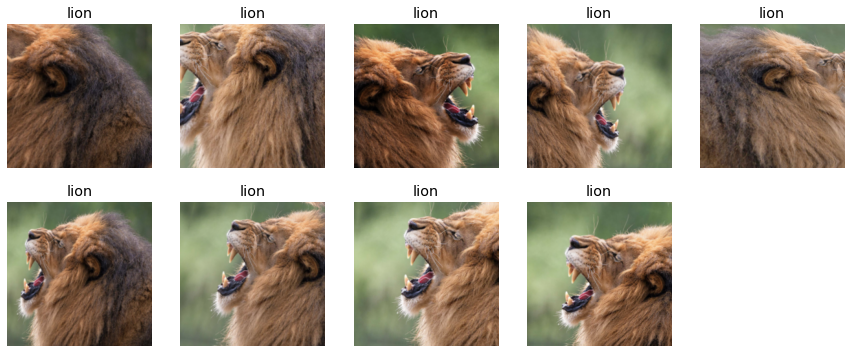

In [26]:
data.train.show_batch(nrows=2 , unique=True)

In [28]:
learn = cnn_learner(data, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


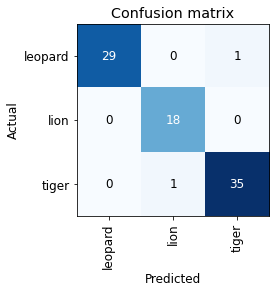

In [29]:
interp= ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

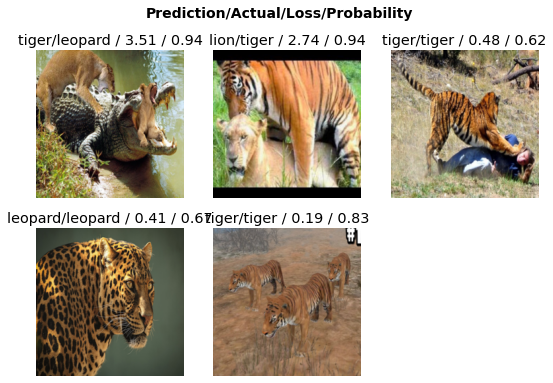

In [30]:
interp.plot_top_losses(5, nrows=2)

In [31]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [32]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [33]:
learn.export()

In [34]:
path = Path()
path.ls(file_exts='.pkl')

(#0) []

In [36]:
learn.dls.vocab

(#3) ['leopard','lion','tiger']

In [37]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [38]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [42]:
out_pl = widgets.Output()

In [44]:
lbl_pred = widgets.Label()

In [48]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [49]:
VBox([widgets.Label('Select your animal!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable voila —sys-prefix